The purpose of this analysis is to discover different traits and tendencies of distinct types of users (casual and member) of a Bikeshare company, using data taken from the past 12 months. 
First we'll import the libraries necessary to carry out the data manipulation

In [1]:

library(tidyverse)  #helps wrangle data
library(lubridate)  #helps wrangle date attributes
library(ggplot2)  #helps visualize data

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




This step sets our time and date to English language standardsSys.setlocale("LC_TIME", "English")

In [2]:
Sys.setlocale("LC_TIME", "English")

Warning message in Sys.setlocale("LC_TIME", "English"):
“OS reports request to set locale to "English" cannot be honored”


[1] ""

Now we read our data from CSVs into variables in R

In [3]:
dec2021 <- read.csv("/202112-divvy-tripdata.csv")
jan2022 <- read.csv("/202201-divvy-tripdata.csv")
feb2022 <- read.csv("/202202-divvy-tripdata.csv")
mar2022 <- read.csv("/202203-divvy-tripdata.csv")
apr2022 <- read.csv("/202204-divvy-tripdata.csv")
may2022 <- read.csv("/202205-divvy-tripdata.csv")
jun2022 <- read.csv("/202206-divvy-tripdata.csv")
jul2022 <- read.csv("/202207-divvy-tripdata.csv")
aug2022 <- read.csv("/202208-divvy-tripdata.csv")
sep2022 <- read.csv("/202209-divvy-publictripdata.csv")
oct2022 <- read.csv("/202210-divvy-tripdata.csv")
nov2022 <- read.csv("/202211-divvy-tripdata.csv")

This is optional, but I made a list of lists for the data, so that future code would be DRYer


In [4]:
months_data <- list(dec2021, jan2022, feb2022, mar2022, apr2022, may2022, jun2022, jul2022, aug2022, sep2022, oct2022, nov2022)


Here we check to make sure that our different months all have the same column names and data types


In [5]:
for(month in months_data){
  print(colnames(month))
  print(str(month))
}

 [1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"     
'data.frame':	247540 obs. of  13 variables:
 $ ride_id           : chr  "46F8167220E4431F" "73A77762838B32FD" "4CF42452054F59C5" "3278BA87BF698339" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : chr  "2021-12-07 15:06:07" "2021-12-11 03:43:29" "2021-12-15 23:10:28" "2021-12-26 16:16:10" ...
 $ ended_at          : chr  "2021-12-07 15:13:42" "2021-12-11 04:10:23" "2021-12-15 23:23:14" "2021-12-26 16:30:53" ...
 $ start_station_name: chr  "Laflin St & Cullerton St" "LaSalle Dr & Huron St" "Halsted St & North Branch St" "Halsted St & North Branch St" ...
 $ start_station_id  : chr  "13307" "KP1705001026" "KA1504000117" "KA1

Next we bind all of our observations together into one dataframe


In [6]:
all_trips <- bind_rows(dec2021, jan2022, feb2022, mar2022, apr2022, may2022, jun2022, jul2022, aug2022, sep2022, oct2022, nov2022)


Here we remove rows that have values of NA


In [7]:
all_trips <- na.omit(all_trips)


Check to make sure all observations with start or end time missing have been removed


In [8]:
nrow(all_trips[all_trips$started_at == "",])
nrow(all_trips[all_trips$ended_at == "",])

[1] 0

[1] 0

View basic details and some rows of all_trips


In [9]:
nrow(all_trips)

dim(all_trips)

head(all_trips)

tail(all_trips)
str(all_trips)
summary(all_trips)

[1] 5727577

[1] 5727577      13

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,46F8167220E4431F,electric_bike,2021-12-07 15:06:07,2021-12-07 15:13:42,Laflin St & Cullerton St,13307,Morgan St & Polk St,TA1307000130,41.85483,-87.66366,41.87197,-87.65097,member
2,73A77762838B32FD,electric_bike,2021-12-11 03:43:29,2021-12-11 04:10:23,LaSalle Dr & Huron St,KP1705001026,Clarendon Ave & Leland Ave,TA1307000119,41.89441,-87.63233,41.96797,-87.65000,casual
3,4CF42452054F59C5,electric_bike,2021-12-15 23:10:28,2021-12-15 23:23:14,Halsted St & North Branch St,KA1504000117,Broadway & Barry Ave,13137,41.89936,-87.64852,41.93758,-87.64410,member
4,3278BA87BF698339,classic_bike,2021-12-26 16:16:10,2021-12-26 16:30:53,Halsted St & North Branch St,KA1504000117,LaSalle Dr & Huron St,KP1705001026,41.89939,-87.64854,41.89488,-87.63233,member
5,6FF54232576A3B73,electric_bike,2021-12-30 11:31:05,2021-12-30 11:51:21,Leavitt St & Chicago Ave,18058,Clark St & Drummond Pl,TA1307000142,41.89558,-87.68202,41.93125,-87.64434,member
6,93E8D79490E3AB11,classic_bike,2021-12-01 18:28:36,2021-12-01 18:38:03,Wabash Ave & 16th St,SL-012,Wells St & Polk St,SL-011,41.86038,-87.62581,41.87260,-87.63350,member


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5733446,E4F708DDC80A274C,electric_bike,2022-11-20 17:38:28,2022-11-20 17:41:01,Wabash Ave & Grand Ave,TA1307000117,,,41.89151,-87.62669,41.89000,-87.62000,member
5733447,C349E243A9BAA6F7,electric_bike,2022-11-25 11:19:52,2022-11-25 11:31:50,Wabash Ave & Grand Ave,TA1307000117,,,41.89184,-87.62681,41.89000,-87.62000,member
5733448,B0B4E85DA43A9194,classic_bike,2022-11-22 16:57:53,2022-11-22 17:31:29,Franklin St & Jackson Blvd,TA1305000025,Sheffield Ave & Wrightwood Ave,TA1309000023,41.87771,-87.63532,41.92871,-87.65383,casual
5733449,8D148DD47B59530B,classic_bike,2022-11-06 13:04:05,2022-11-06 13:13:33,Michigan Ave & Ida B Wells Dr,TA1305000010,Shedd Aquarium,15544,41.87624,-87.62443,41.86723,-87.61536,casual
5733450,0D1170BA18FD33D1,classic_bike,2022-11-06 09:41:29,2022-11-06 15:17:17,Halsted St & 18th St,13099,Shedd Aquarium,15544,41.85751,-87.64599,41.86723,-87.61536,casual
5733451,09B20DC75B5EA1E0,electric_bike,2022-11-26 11:59:28,2022-11-26 12:31:04,Michigan Ave & Ida B Wells Dr,TA1305000010,Shedd Aquarium,15544,41.87627,-87.62458,41.86723,-87.61536,casual


'data.frame':	5727577 obs. of  13 variables:
 $ ride_id           : chr  "46F8167220E4431F" "73A77762838B32FD" "4CF42452054F59C5" "3278BA87BF698339" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : chr  "2021-12-07 15:06:07" "2021-12-11 03:43:29" "2021-12-15 23:10:28" "2021-12-26 16:16:10" ...
 $ ended_at          : chr  "2021-12-07 15:13:42" "2021-12-11 04:10:23" "2021-12-15 23:23:14" "2021-12-26 16:30:53" ...
 $ start_station_name: chr  "Laflin St & Cullerton St" "LaSalle Dr & Huron St" "Halsted St & North Branch St" "Halsted St & North Branch St" ...
 $ start_station_id  : chr  "13307" "KP1705001026" "KA1504000117" "KA1504000117" ...
 $ end_station_name  : chr  "Morgan St & Polk St" "Clarendon Ave & Leland Ave" "Broadway & Barry Ave" "LaSalle Dr & Huron St" ...
 $ end_station_id    : chr  "TA1307000130" "TA1307000119" "13137" "KP1705001026" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_l

   ride_id          rideable_type       started_at          ended_at        
 Length:5727577     Length:5727577     Length:5727577     Length:5727577    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5727577     Length:5727577     Length:5727577     Length:5727577    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

Create a table showing the number of observations for each category of member


In [10]:
table(all_trips$member_casual)



 casual  member 
2341687 3385890 

Here we are able to separate information based on month, day, and year, as well as find corresponding days of the week


In [11]:
all_trips$date <- as.Date(all_trips$started_at)

head(all_trips)

all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>
1,46F8167220E4431F,electric_bike,2021-12-07 15:06:07,2021-12-07 15:13:42,Laflin St & Cullerton St,13307,Morgan St & Polk St,TA1307000130,41.85483,-87.66366,41.87197,-87.65097,member,2021-12-07
2,73A77762838B32FD,electric_bike,2021-12-11 03:43:29,2021-12-11 04:10:23,LaSalle Dr & Huron St,KP1705001026,Clarendon Ave & Leland Ave,TA1307000119,41.89441,-87.63233,41.96797,-87.65000,casual,2021-12-11
3,4CF42452054F59C5,electric_bike,2021-12-15 23:10:28,2021-12-15 23:23:14,Halsted St & North Branch St,KA1504000117,Broadway & Barry Ave,13137,41.89936,-87.64852,41.93758,-87.64410,member,2021-12-15
4,3278BA87BF698339,classic_bike,2021-12-26 16:16:10,2021-12-26 16:30:53,Halsted St & North Branch St,KA1504000117,LaSalle Dr & Huron St,KP1705001026,41.89939,-87.64854,41.89488,-87.63233,member,2021-12-26
5,6FF54232576A3B73,electric_bike,2021-12-30 11:31:05,2021-12-30 11:51:21,Leavitt St & Chicago Ave,18058,Clark St & Drummond Pl,TA1307000142,41.89558,-87.68202,41.93125,-87.64434,member,2021-12-30
6,93E8D79490E3AB11,classic_bike,2021-12-01 18:28:36,2021-12-01 18:38:03,Wabash Ave & 16th St,SL-012,Wells St & Polk St,SL-011,41.86038,-87.62581,41.87260,-87.63350,member,2021-12-01


Here we make our start and end times POSIX objects, so they can be subtracted and made into time differences


In [12]:
all_trips$started_at <- as.POSIXct(all_trips$started_at, format="%Y-%m-%d %H:%M:%S")
all_trips$ended_at <- as.POSIXct(all_trips$ended_at, format="%Y-%m-%d %H:%M:%S")

Find the length of each ride


In [13]:
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)


Make sure ride_length is a number


In [14]:
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

[1] FALSE

[1] TRUE

Filter out company test rides


In [15]:
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]
all_trips_v2 <- na.omit(all_trips_v2)

Compare to see difference in number of observations in original vs filtered data


In [16]:
dim(all_trips_v2)
dim(all_trips)

[1] 5727477      19

[1] 5727577      19

Organize and view mean ride length by day of week and member type


In [17]:
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,1516.2493
member,Sunday,822.5167
casual,Monday,1363.5118
member,Monday,720.6719
casual,Tuesday,1190.0300
member,Tuesday,710.1027
casual,Wednesday,1154.0373
member,Wednesday,708.3210
casual,Thursday,1193.1905


Create a graph that shows difference by bike type, divided by member type


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
Saving 12.5 x 6.67 in image



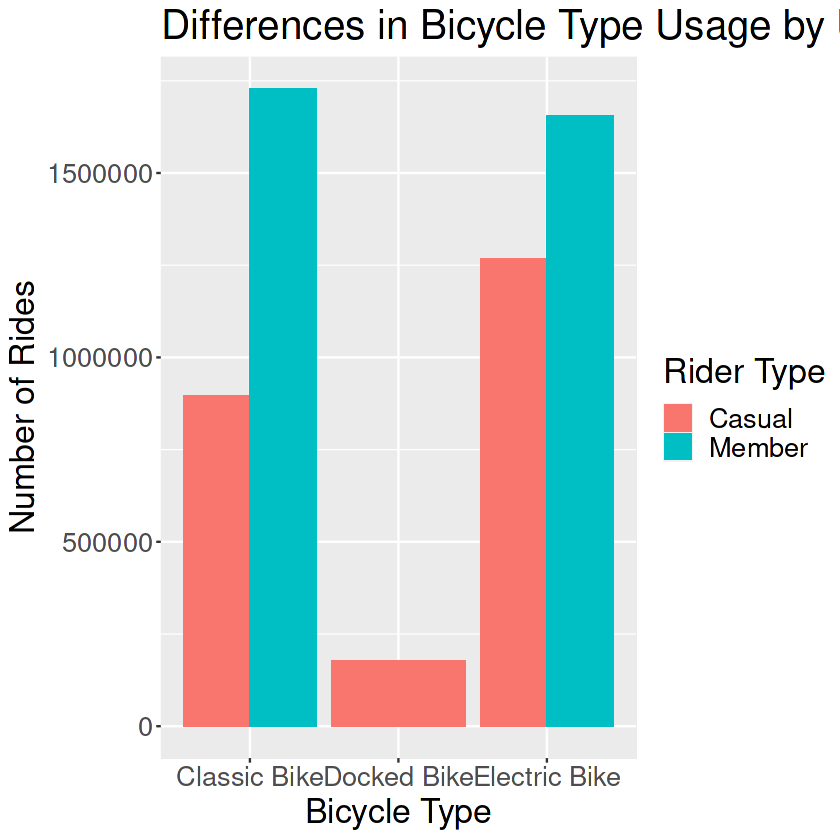

In [18]:
all_trips_v2 %>%
  group_by(member_casual, rideable_type) %>%
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>%
  ggplot(mapping = aes(x=rideable_type, y=number_of_rides, fill=member_casual)) +
  labs(x="Bicycle Type", y="Number of Rides") +
  guides(fill = guide_legend(title = "Rider Type")) +
  scale_fill_discrete(labels=c('Casual', 'Member')) +
  scale_x_discrete(labels = c('Classic Bike', 'Docked Bike', 'Electric Bike')) +
  ggtitle("Differences in Bicycle Type Usage by User Type") +
  theme(text = element_text(size = 20)) +
  geom_col(position = "dodge")

ggsave("Bike_Differences.png")

Create a graph showing riding trends (number of rides) by rider type over the days of the week


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
Saving 12.5 x 6.67 in image



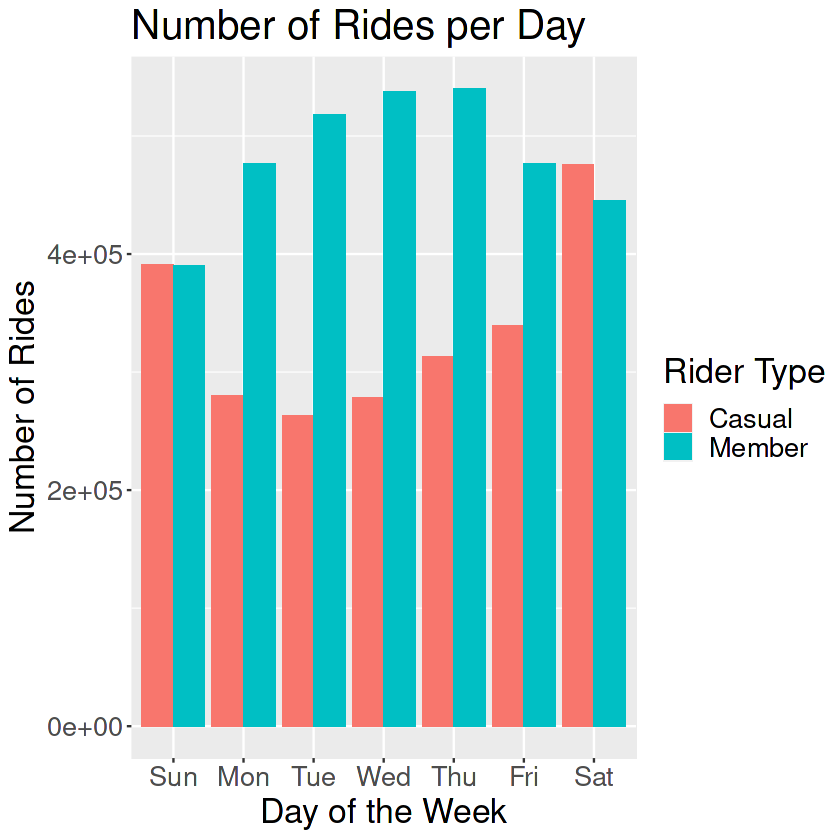

In [19]:
all_trips_v2 %>%
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  labs(x="Day of the Week", y="Number of Rides") +
  guides(fill = guide_legend(title = "Rider Type")) +
  scale_fill_discrete(labels=c('Casual', 'Member')) +
  ggtitle("Number of Rides per Day") +
  theme(text = element_text(size = 20)) +
  geom_col(position = "dodge")

ggsave("Rides_per_Day.png")

Create a graph showing riding trends (mean length) by rider type over the days of the week

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
Saving 12.5 x 6.67 in image



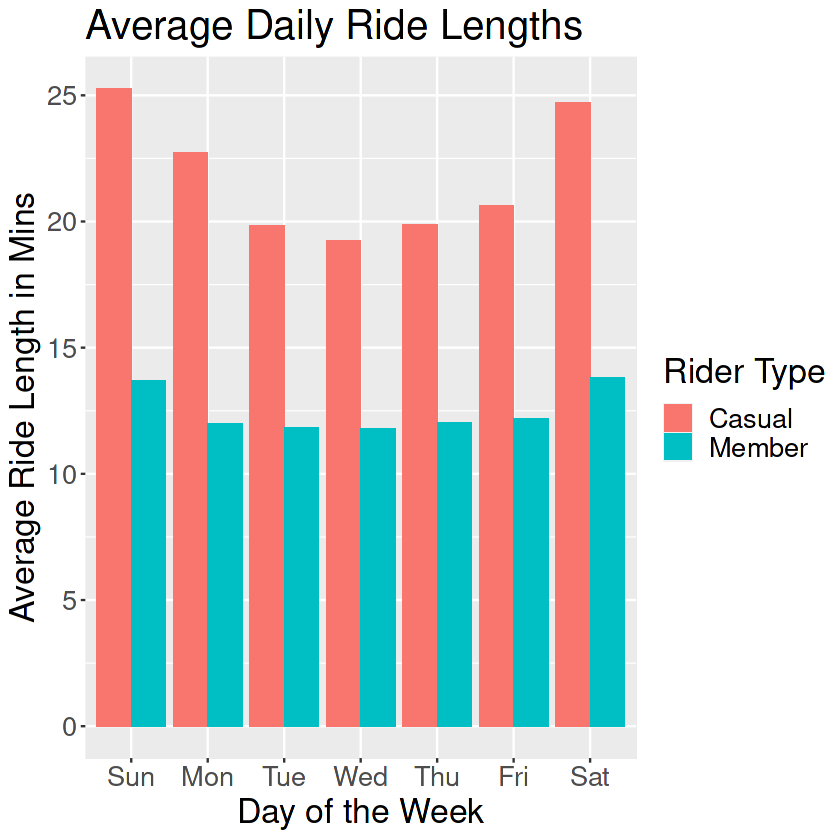

In [20]:
all_trips_v2 %>%
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration / 60, fill = member_casual)) +
  labs(x="Day of the Week", y="Average Ride Length in Mins") +
  guides(fill = guide_legend(title = "Rider Type")) +
  scale_fill_discrete(labels=c('Casual', 'Member')) +
  ggtitle("Average Daily Ride Lengths") +
  theme(text = element_text(size = 20)) +
  geom_col(position = "dodge")
ggsave("Ride_Length_per_Day.png")

Create 4 graphs, showing the top 5 start and end station, divided by user type


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
Saving 12.5 x 6.67 in image

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


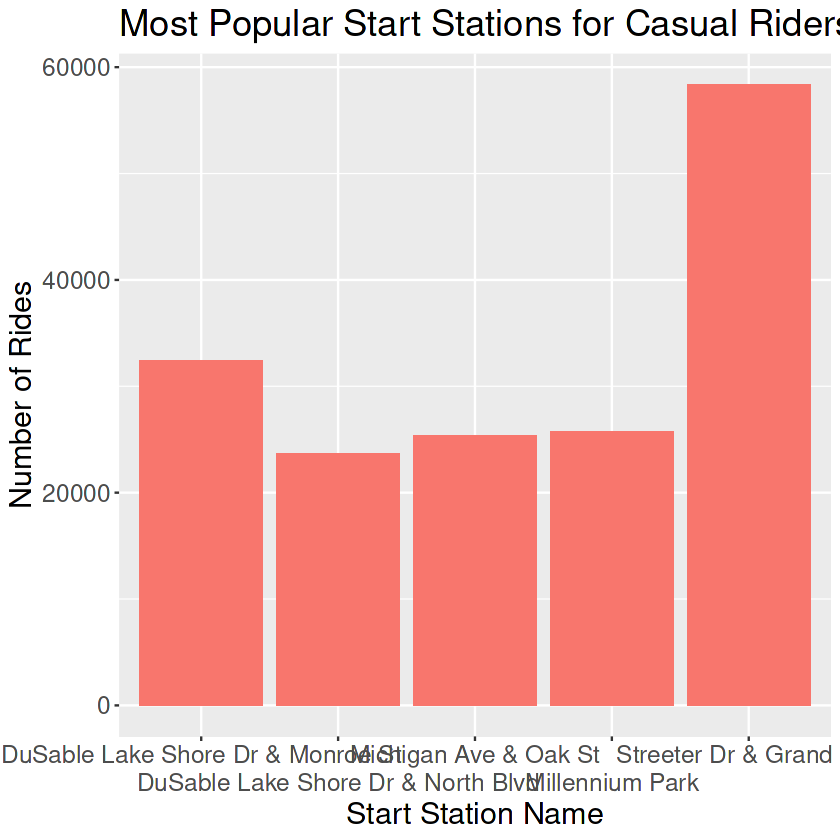

Saving 12.5 x 6.67 in image

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


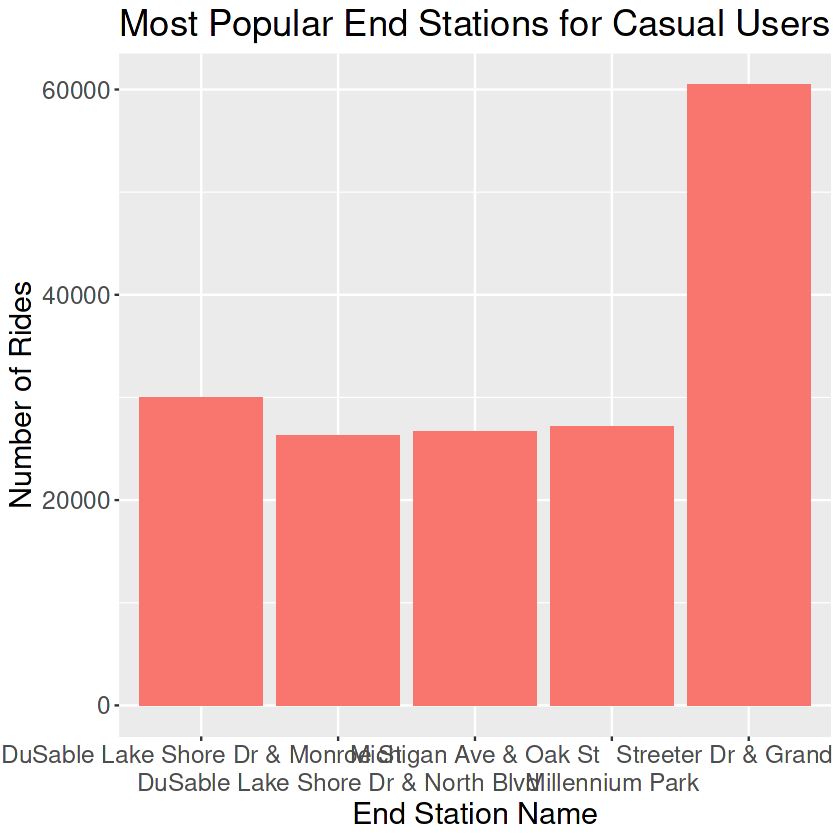

Saving 12.5 x 6.67 in image

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


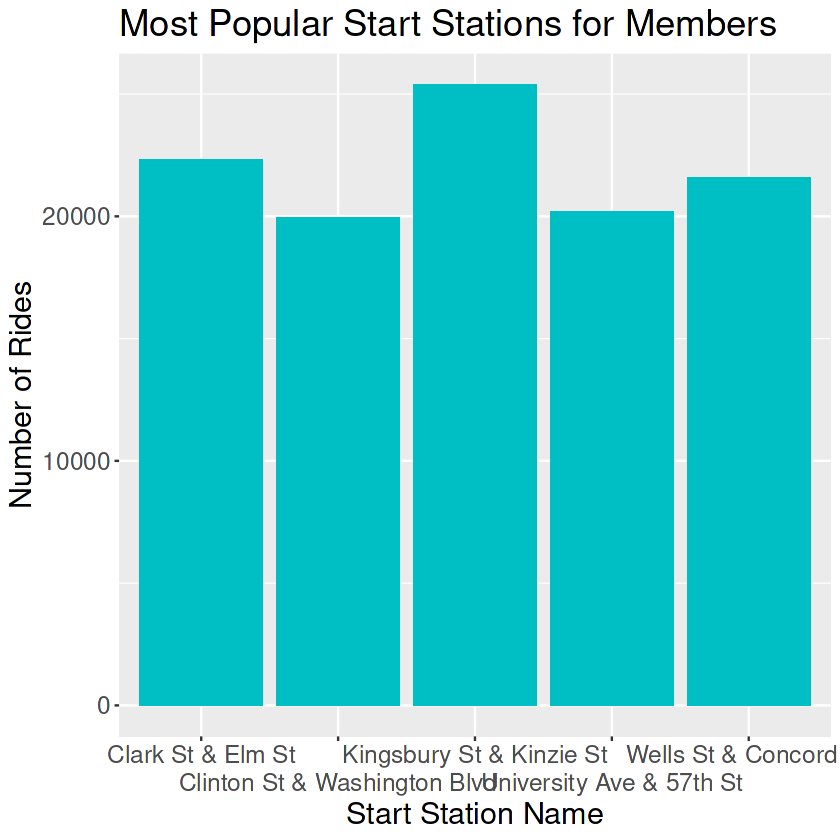

Saving 12.5 x 6.67 in image



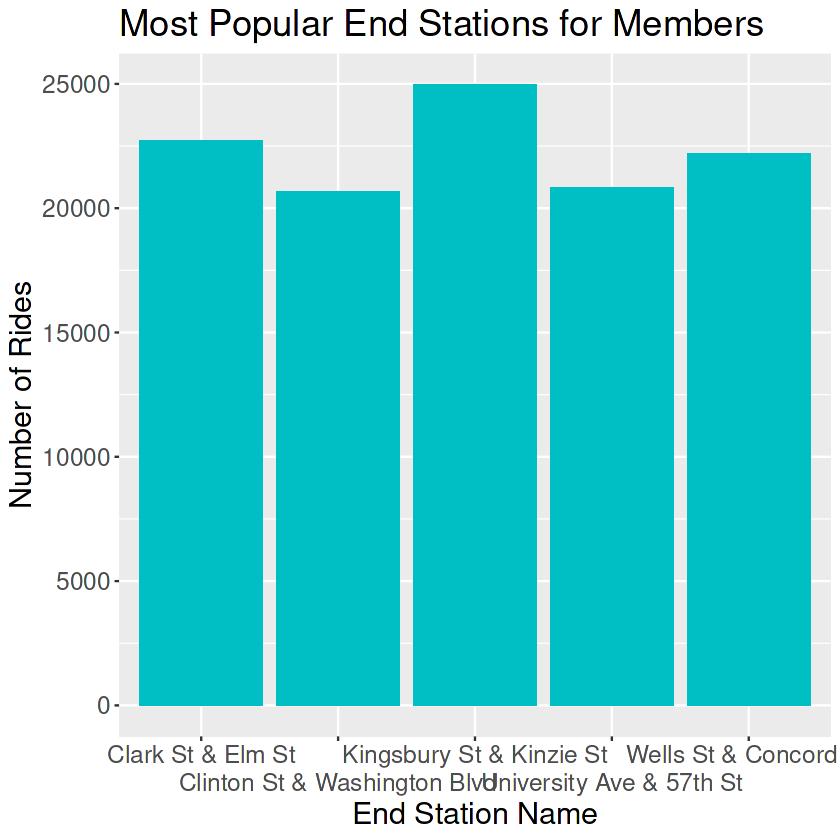

In [21]:
#Top 5 start stations for casual riders
all_trips_v2 %>%
  group_by(member_casual, start_station_name) %>%
  summarise(number_of_rides = n()) %>%
  filter(start_station_name != "" & member_casual == "casual" & number_of_rides > 22000) %>%
  ggplot(mapping = aes(x=start_station_name, y=number_of_rides)) +
  labs(x="Start Station Name", y="Number of Rides") +
  ggtitle("Most Popular Start Stations for Casual Riders") +
  scale_x_discrete(guide = guide_axis(n.dodge=2))+
  theme(text = element_text(size = 18)) +
  geom_col(fill="#F8766D")
ggsave("Top_five_start_casual.png")

#Top 5 end stations for casual riders
all_trips_v2 %>%
  group_by(member_casual, end_station_name) %>%
  summarise(number_of_rides = n()) %>%
  filter(end_station_name != "" & member_casual == "casual" & number_of_rides > 22000) %>%
  ggplot(mapping = aes(x=end_station_name, y=number_of_rides)) +
  labs(x="End Station Name", y="Number of Rides") +
  ggtitle("Most Popular End Stations for Casual Users") +
  scale_x_discrete(guide = guide_axis(n.dodge=2))+
  theme(text = element_text(size = 18)) +
  geom_col(fill="#F8766D")
ggsave("Top_five_end_casual.png")

#Top 5 start stations for member riders
all_trips_v2 %>%
  group_by(member_casual, start_station_name) %>%
  summarise(number_of_rides = n()) %>%
  filter(start_station_name != "" & member_casual == "member" & number_of_rides > 19700) %>%
  ggplot(mapping = aes(x=start_station_name, y=number_of_rides)) +
  labs(x="Start Station Name", y="Number of Rides") +
  ggtitle("Most Popular Start Stations for Members") +
  scale_x_discrete(guide = guide_axis(n.dodge=2))+
  theme(text = element_text(size = 18)) +
  geom_col(fill="#00BFC4")
ggsave("Top_five_start_member.png")

#Top 5 end stations for member riders
all_trips_v2 %>%
  group_by(member_casual, end_station_name) %>%
  summarise(number_of_rides = n()) %>%
  filter(end_station_name != "" & member_casual == "member" & number_of_rides > 20500) %>%
  ggplot(mapping = aes(x=end_station_name, y=number_of_rides)) +
  labs(x="End Station Name", y="Number of Rides") +
  ggtitle("Most Popular End Stations for Members") +
  scale_x_discrete(guide = guide_axis(n.dodge=2))+
  theme(text = element_text(size = 18)) +
  geom_col(fill="#00BFC4")
ggsave("Top_five_end_member.png")

Create a graph that compares number of rides over months between types of users


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
Saving 12.5 x 6.67 in image



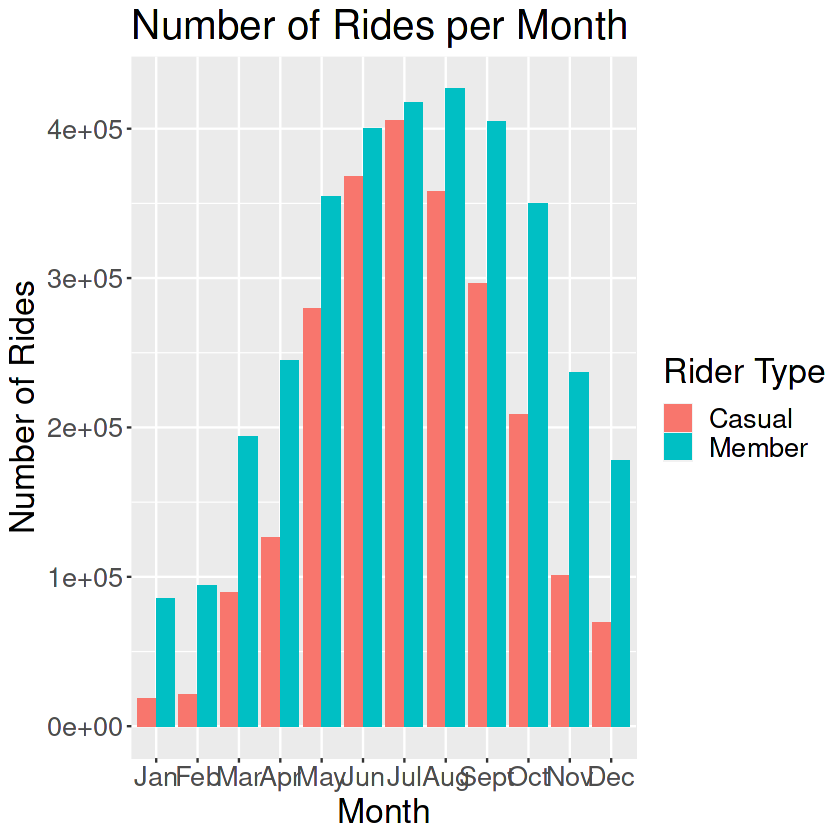

In [22]:
all_trips_v2 %>%
  group_by(member_casual, month)%>%
  summarise(number_of_rides = n())%>%
  ggplot(mapping = aes(x=month, y=number_of_rides, fill=member_casual)) +
  labs(x="Month", y="Number of Rides") +
  ggtitle("Number of Rides per Month") +
  guides(fill = guide_legend(title = "Rider Type")) +
  scale_fill_discrete(labels=c('Casual', 'Member')) +
  scale_x_discrete(labels = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', "Sept", "Oct", "Nov", "Dec")) +
  theme(text = element_text(size = 20)) +
  geom_col(position='dodge')
ggsave("Rides_per_Month.png")

Create a graph that compares average time usage over months between types of users


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
Saving 12.5 x 6.67 in image



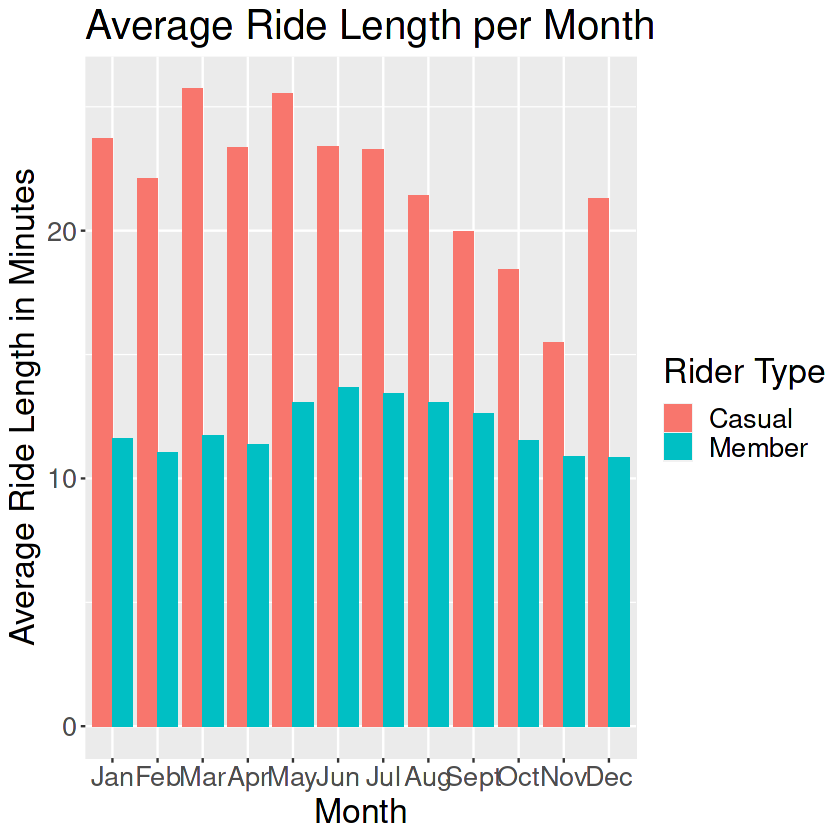

In [23]:
all_trips_v2 %>%
  group_by(member_casual, month)%>%
  summarise(average_duration =mean(ride_length))%>%
  ggplot(mapping = aes(x=month, y=average_duration / 60, fill=member_casual)) +
  labs(x="Month", y="Average Ride Length in Minutes") +
  ggtitle("Average Ride Length per Month") +
  guides(fill = guide_legend(title = "Rider Type")) +
  scale_fill_discrete(labels=c('Casual', 'Member')) +
  scale_x_discrete(labels = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', "Sept", "Oct", "Nov", "Dec")) +
  theme(text = element_text(size = 20)) +
  geom_col(position='dodge')
ggsave("Ride_Length_by_Month.png")

In [24]:
file.remove("/kaggle/working/Rplot001.png")
file.remove("/kaggle/working/Rplot002.png")
file.remove("/kaggle/working/Rplot003.png")
file.remove("/kaggle/working/Rplot004.png")

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE